# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 2. Простой анализ данных.

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`** и html-версии графиков (подробности в условии).
* Телеграм не разрешает боту получать файлы более **20 Мб**. Если ваше решение весит больше, *заранее* разделите ноутбук на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания **используйте этот ноутбук в качестве основы, ничего не удаляя из него**. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 1.**

---

**Баллы за задание:**

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 2 &mdash; 80 баллов

---

In [327]:
# Bot check

# HW_ID: fpmi_ad2
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную

In [328]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')


---
### <font color="orange"><i>Сложная часть</i></font>

### Задача 2

<a target="_blank" href="https://www.yelp.com/">Yelp</a> — веб-сайт для поиска на местном рынке услуг, например ресторанов или парикмахерских, с возможностью добавлять и просматривать рейтинги и обзоры этих услуг. Для популярных бизнесов имеются сотни обзоров. Для обозревателей на сайте предусмотрены элементы социальной сети.

![Yelp_Logo_No_Outline_Color.jpg](attachment:Yelp_Logo_No_Outline_Color.jpg)

_____________

Вам предоставляется следующая информация о компаниях на Yelp:

Файл `yelp_business.csv`:
* `business_id` — уникальный идентификатор компании;
* `name` — имя компании;
* `address`, `city`, `state` — месторасположении компании;
* `latitude`, `longitude` — географические координаты;
* `categories` — категории услуг компании.

Файл `yelp_review.csv`, содержащий оценки пользователей:
* `business_id` — идентификатор компании, соответствующий файлу `yelp_business.csv`;
* `stars` — поставленная пользователем оценка от 1 до 5.

В целях сокращения объема файла, текстовые отзывы пользователей не были включены.

Оригинальную версию датасета в формате `json` можно посмотреть по <a target="_blank" href="https://www.kaggle.com/yelp-dataset/yelp-dataset/data">ссылке</a>, но использовать нужно выданные данные.

_____________

**Что нужно сделать:**

* Найти город с наибольшим количеством компаний;
* Для этого города определить районы с наиболее качественными услугами. <a target="_blank" href="https://yandex.ru/company/researches/2017/msk_mobile_map">Пример</a> с несколько другой задачей.
* А также найти рестораны с наилучшими отзывами.


*Далее в условии встречаются различные подсказки, как можно выполнить определенные части задачи. Вы можете их игнорировать и делать иным способом для получения **того же самого промежуточного результата**. Однако, если ваше решение окажется **значительно** менее эффективным (по скорости, количеству и красоте кода) по сравнению с предполагаемым, баллы могут быть снижены.*

------

#### 1. Город с наибольшим количеством компаний

Загрузите данные из файла `yelp_business.csv` с помощью функции `pd.read_csv`. Посмотрите на первые несколько строк с помощью метода `head`.

In [329]:
df = pd.read_csv("yelp_business.csv")

In [330]:
df.head()

Unnamed: 0             business_id                        name  \
0           0  FYWN1wneV18bWNgQjJ2GNg          "Dental by Design"   
1           1  He-G7vWjzVUysIKrfNbPUQ       "Stephen Szabo Salon"   
2           2  KQPW8lFf1y5BT2MxiSZ3QA     "Western Motor Vehicle"   
3           3  8DShNS-LuFqpEWIp0HxijA          "Sports Authority"   
4           4  PfOCPjBrlQAnz__NXj9h_w  "Brick House Tavern + Tap"   

  neighborhood                           address            city state  \
0          NaN        "4855 E Warner Rd, Ste B9"       Ahwatukee    AZ   
1          NaN              "3101 Washington Rd"        McMurray    PA   
2          NaN          "6025 N 27th Ave, Ste 1"         Phoenix    AZ   
3          NaN  "5000 Arizona Mills Cr, Ste 435"           Tempe    AZ   
4          NaN                    "581 Howe Ave"  Cuyahoga Falls    OH   

  postal_code   latitude   longitude  is_open  \
0       85044  33.330690 -111.978599        1   
1       15317  40.291685  -80.104900        1   
2       85017  33.524903 -112.115310        1   
3       85282  33.383147 -111.964725        0   
4       44221  41.119535  -81.475690        1   

                                          categories  
0  Dentists;General Dentistry;Health & Medical;Or...  
1  Hair Stylists;Hair Salons;Men's Hair Salons;Bl...  
2  Departments of Motor Vehicles;Public Services ...  
3                            Sporting Goods;Shopping  
4  American (New);Nightlife;Bars;Sandwiches;Ameri...

Найдите пять городов, по которым присутствует информация о наибольшем количестве компаний. В таблице должен быть указан город (название) и количество компаний в этом городе.

*Подсказка.* Для выполнения стоит воспользоваться методами `groupby`, `count`, `sort_values`, `head`.

In [331]:
df.groupby(by='city').count().sort_values(by=['name'], ascending=False).head()[['name']].rename(columns={'name': 'count'})

count
city             
Las Vegas   26775
Phoenix     17213
Toronto     17206
Charlotte    8553
Scottsdale   8228

Пусть `N` &mdash; город с наибольшим количеством компаний. Оставьте в таблице только записи, соответствующие городу `N`. Нанесите все эти компании на график, в котором по оси $x$ отметьте долготу, а по оси $y$ &mdash; широту.

In [332]:
frequented = df.groupby(by='city').count().sort_values(by=['name'], ascending=False).index[0]
freq_df = df[df['city'] == frequented]

Text(0.5, 1.0, 'All Las Vegas companies location')

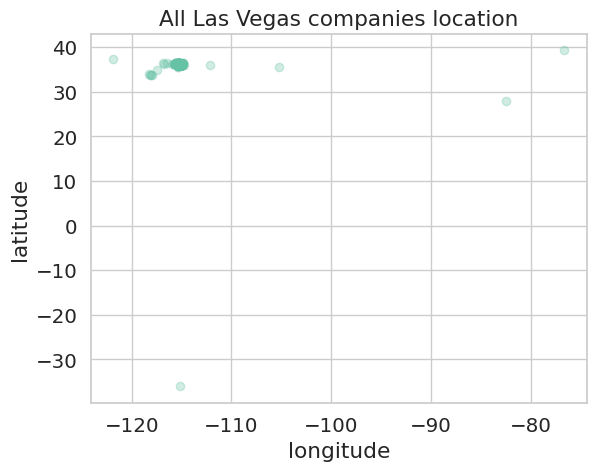

In [333]:
plt.scatter(freq_df['longitude'], freq_df['latitude'], alpha=0.3)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title(f"All {frequented} companies location")

Сам город находится в сгустке точек. Есть какие-то компании, которые приписаны к этому городу, но находятся далеко от него. Избавьтесь от них, подобрав некоторые границы значений широты и долготы. Изобразите все компании на новом графике. На этом графике должны выделяться некоторые улицы.

(-115.4, -115.0)

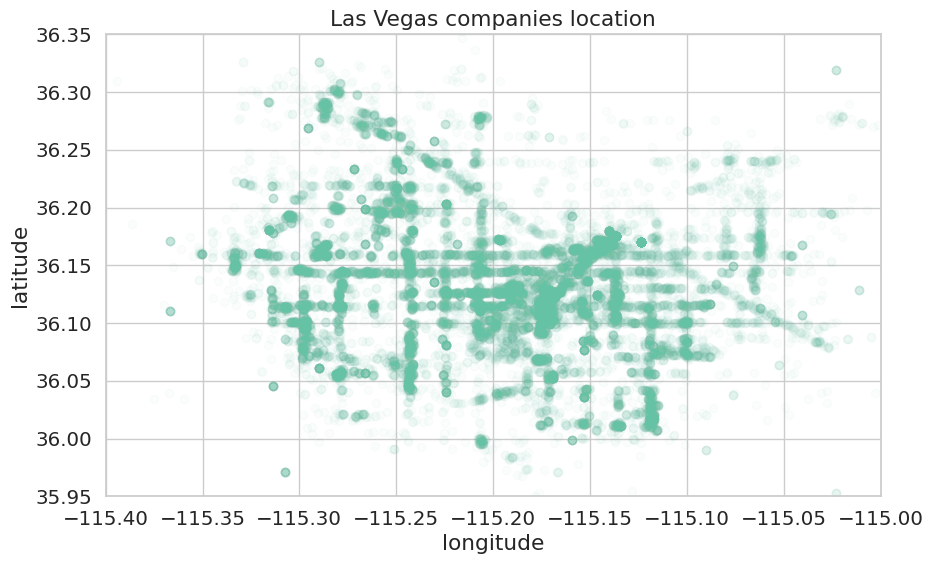

In [334]:
plt.figure(figsize=(10,6))
plt.scatter(freq_df['longitude'], freq_df['latitude'], alpha=0.03)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title(f"{frequented} companies location")
plt.ylim(35.95, 36.35)
plt.xlim(-115.4,-115)

Разберитесь с тем, как подгрузить интерактивную карту города в качестве фона графика. Можно пойти двумя следующими способами.
1. Изучить <a href="https://miptstats.github.io/courses/python/11_plotly.html" target="_blank">материалы</a> по библиотеке <a href="https://plotly.com/python/" target="_blank"><b>Plotly</b></a>. Возможно, потребуется также заглянуть в документацию.
1. Поразбираться с библиотекой <a href="https://github.com/python-visualization/folium" target="_blank"><b>Folium</b></a>. Посмотрите множество <a href="https://nbviewer.org/github/python-visualization/folium/tree/main/examples/" target="_blank">примеров</a>, может также помочь <a href="https://proglib.io/p/python-web-map" target="_blank">статья на русском</a>.

*Внимание!* Интерактивная карта может не сохраниться в ноутбуке, а если сохранится, то вес ноутбука может превзойти 20 Мб, и его не получится отправить боту. В любом случае **<u>необходимо сохранить карту в html и отправить ее отдельным файлом в бот.</u>** При этом каждый файл html должен не превышать 20 Мб, присылать файлы в архиве нельзя. Аналогично со всеми следующими интерактивными графиками в этом задании.

In [335]:
import pandas as pd

import plotly.express as px

fig = px.scatter_mapbox(freq_df, lat="latitude", lon="longitude",
                        hover_name='name', hover_data=['address'],
                        center={'lat': freq_df['latitude'].mean(), 'lon': freq_df['longitude'].mean()},
                        zoom=10, width=1000, height=800,
                        title=f"{frequented} companies location")
fig.update_layout(mapbox_style="open-street-map")
fig.write_html(f"{frequented.replace(' ', '')}_companies.html")
fig.show()

Тут видно, что большая часть компаний находятся "вдоль улиц". Тут ни явно прорисовываются.

Если все получилось, вы молодцы! Далее в этой задаче тоже стройте интерактивные карты. Если нет желания разбираться с интерактивными графиками, можно построить статичные, но баллы будут снижены.

#### 2. Оценки компаний

Для выполнения задания нужно посчитать среднюю оценку каждой компании, а также количество выставленных оценок.

Загрузите таблицу оценок `yelp_review.csv`.

In [336]:
review = pd.read_csv('yelp_review.csv')

В подгруженной таблице оценок оставьте только компании города `N`. Для этого установите значения `business_id` в качестве индекса у таблицы оценок и воспользуйтесь методом `loc`.

*Подсказка.* Чтобы индекс снова сделать полем таблицы, можно воспользоваться методом `reset_index`.

Здесь взяла intersection с business_id у freq_df, т.к. не у всех business_id есть хотя бы одна оценка

In [337]:
review = review.set_index('business_id')
indexes = review.index.intersection(freq_df['business_id'].values)

freq_review = review.loc[indexes].reset_index()[['business_id', 'stars']]
review.reset_index(inplace=True)

Теперь посчитайте среднюю оценку каждой компании, а также количество выставленных компании оценок.

*Подсказка.* Помочь в этом могут функции `groupby` и `aggregate([np.mean, np.size])`.

In [338]:
review_stats = freq_review.groupby('business_id').stars.aggregate([np.mean, np.size])
review_stats

mean  size
business_id                           
--9e1ONYQuAa-CB_Rrw7Tw  4.082278   948
--DdmeR16TRb3LsjG0ejrQ  3.000000     4
--WsruI0IGEoeRmkErU5Gg  4.888889     9
--Y7NhBKzLTbNliMUX_wfg  4.750000     4
--e8PjCNhEz32pprnPhCwQ  3.800000    10
...                          ...   ...
zzOo9n22fBbKAhbSpMzggA  3.411765    17
zzXuJF6UUT1kgTyCsmgDmQ  5.000000     2
zzjqFOujmM9surbMANZ_ag  5.000000     1
zzsKbL1KMNJqazSqBXskxQ  4.000000     5
zzzaIBwimxVej4tY6qFOUQ  3.100000    20

[26544 rows x 2 columns]

Назовите колонки таблицы красивыми именами, изменив `<имя таблицы>.columns`, после чего напечатайте несколько строк полученной таблицы. Красивые имена &mdash; то, что будет понятно простому человеку при чтении ваших результатов. Как именно их назвать &mdash; задача аналитика, то есть в данном случае ваша :)

In [339]:
review_stats = review_stats.rename(columns={'mean': 'mean_mark', 'size': 'review_count'})
review_stats

mean_mark  review_count
business_id                                    
--9e1ONYQuAa-CB_Rrw7Tw   4.082278           948
--DdmeR16TRb3LsjG0ejrQ   3.000000             4
--WsruI0IGEoeRmkErU5Gg   4.888889             9
--Y7NhBKzLTbNliMUX_wfg   4.750000             4
--e8PjCNhEz32pprnPhCwQ   3.800000            10
...                           ...           ...
zzOo9n22fBbKAhbSpMzggA   3.411765            17
zzXuJF6UUT1kgTyCsmgDmQ   5.000000             2
zzjqFOujmM9surbMANZ_ag   5.000000             1
zzsKbL1KMNJqazSqBXskxQ   4.000000             5
zzzaIBwimxVej4tY6qFOUQ   3.100000            20

[26544 rows x 2 columns]

Соедините две полученные ранее таблицы по компаниям города `N` в одну.
Для этого сначала установите поле `business_id` в качестве индекса в обеих таблицах с помощью `set_index`. В одной из них это уже должно было быть сделано.
В полученной таблице должны получится поля `latitude`, `longitude`, `categories`, `name`, а также две колонки со средней оценкой компаний и количеством оценок, которые вы посчитали выше.

*Подсказка.* Соединение таблиц можно выполнить с помощью `join`.
Индексы у этих таблиц одинаковые, так что тип джойна не имеет значения.

In [340]:
companies_stats = freq_df.set_index('business_id').join(review_stats)[['latitude', 'longitude', 'categories',
                                                                       'name', 'mean_mark', 'review_count']]

Изобразите все компании на графике, раскрасив точку в цвет, оттенок которого соответствует средней оценке компании. Прозрачность точки выставляйте не более $0.3$. Если у одной компании несколько филиалов с разными адресами, наносите на график все адреса.

Убрала все компании, где не было ни одной оценки, т.к. их мало, ни на что не влияют.

In [341]:
print(len(companies_stats), len(companies_stats.isna().sum()))
companies_stats = companies_stats.dropna()
companies_stats.head()

26775 6


latitude   longitude  \
business_id                                     
kCoE3jvEtg6UVz5SOD3GVw  36.207430 -115.268460   
OD2hnuuTJI9uotcKycxg1A  36.197484 -115.249660   
VBHEsoXQb2AQ76J9l8h1uQ  36.085051 -115.119421   
1Jp_hmPNUZArNqzpbm7B0g  36.056382 -115.269332   
DPQnTnNw2PJj7DdENM98Cw  36.105196 -115.056880   

                                                               categories  \
business_id                                                                 
kCoE3jvEtg6UVz5SOD3GVw  Real Estate Services;Real Estate;Home Services...   
OD2hnuuTJI9uotcKycxg1A                            Shopping;Sporting Goods   
VBHEsoXQb2AQ76J9l8h1uQ       Shopping;Jewelry;Watch Repair;Local Services   
1Jp_hmPNUZArNqzpbm7B0g  Home Services;Lighting Fixtures & Equipment;Lo...   
DPQnTnNw2PJj7DdENM98Cw       Nurseries & Gardening;Home & Garden;Shopping   

                                       name  mean_mark  review_count  
business_id                                                           
kCoE3jvEtg6UVz5SOD3GVw         "BDJ Realty"   3.750000           4.0  
OD2hnuuTJI9uotcKycxg1A        "Soccer Zone"   1.500000           8.0  
VBHEsoXQb2AQ76J9l8h1uQ  "Alfredo's Jewelry"   4.666667          15.0  
1Jp_hmPNUZArNqzpbm7B0g      "Task Electric"   4.333333          12.0  
DPQnTnNw2PJj7DdENM98Cw       "Star Nursery"   4.000000          16.0

In [342]:
fig = px.density_mapbox(companies_stats, lat='latitude', lon='longitude', z='mean_mark', radius=5,
                        hover_name='name', hover_data=['mean_mark', 'review_count'],
                        center={'lat': companies_stats['latitude'].mean(), 'lon': companies_stats['longitude'].mean()},
                        zoom=10, width=1000, height=800, opacity=0.3,
                        title=f"{frequented} companies marks",
                        mapbox_style="open-street-map")
fig.write_html(f"{frequented.replace(' ', '')}_companies_marks.html")
fig.show()

Тут видно, что отдаленные районы более склоны к маленьким оценкам.

Чтобы получить районы города, то есть разделить город на "клетки", округлите значения широты и долготы, подобрав оптимальный размер района.

*Подсказка.* Например, можно сделать так
`np.round(долгота*4, decimals=1)*0.25`.

In [343]:
shape=0.5
districts=1/shape
companies_stats['longitude_round'] = np.round(companies_stats['longitude'].to_numpy() * districts, decimals=1)*shape
companies_stats['latitude_round'] = np.round(companies_stats['latitude'].to_numpy() * districts, decimals=1)*shape

Для получения средней оценки компаний по району постройте сводную таблицу при помощи `pd.pivot_table`, взяв в качестве индексов и колонок округленные широту и долготу, а в качестве значений &mdash; оценки. Аггрегирующей функцией является среднее.

Изобразите полученную таблицу при помощи `sns.heatmap`.

*Замечание.* В качестве среднего можно было бы посчитать как общее среднее по всем оценкам всех компаний, так и среднее по компаниям их средних оценок. В чем разница этих подходов? Какой из них необходимо использовать в данном случае?

Между подходами в данном случае лучше использовать второй. При рассмотрение района мы учитываем все компании там в равной степени. В первом же случае, в район вносят вклад те компании, которые посещаются чаще (на которые больше отзывов), что плохо. Например, в случае одного популярного хорошего магазина и двадцати плохих район должен быть скорее плохой.

In [344]:
coord_mean_mark = pd.pivot_table(companies_stats, values='mean_mark', index=['latitude_round'],
                                 columns=['longitude_round'], aggfunc='mean')

(0.0, 31.0)


Text(0.5, 1.0, 'Las Vegas districts mean marks')

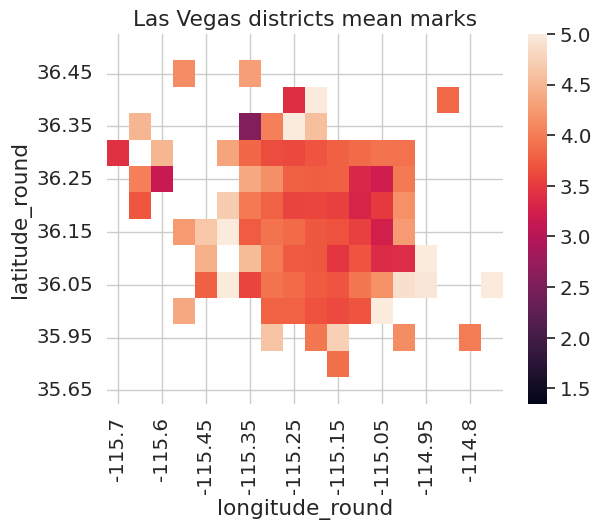

In [345]:
sns.heatmap(coord_mean_mark)
ax=plt.gca()
print(ax.get_xlim())
ax.set_xlim([10, 28])
ax.set_ylim([8, 22])
plt.title(f'{frequented} districts mean marks')

Полученный график имеет ряд недостатков. Во-первых, не очень правильно судить о районе, если в нем мало компаний. Во-вторых,  на графике цветовая гамма автоматически подстроилась под минимальное и максимальное значения оценки.

Почему эти недостатки могут быть существенными?

**Ответ:**

1) Если в районе мало заведений, то нет смысла вообще оценивать район. Нам важно именно СРАВНИТЬ районы. А в этом оценка района с тысячей заведений явно объективней того, где десять.

2) Слишком много районов с оценками, которые выше среднего - около 4. Из-за этого вся карта яркая и незаметны тенденции.

Оставьте районы, в которых имеется информация о не менее $30$ компаний. Постройте новый график районов, использовав параметры `vmin` и `vmax` у функции `sns.heatmap`.

In [346]:
coord_mean_mark = pd.pivot_table(companies_stats, values=['mean_mark', 'review_count'], index=['latitude_round'],
                                 columns=['longitude_round'], aggfunc={'mean_mark':'mean', 'review_count': 'count'})

In [347]:
coord_mean_mark = coord_mean_mark.where(coord_mean_mark['review_count'] >= 30)['mean_mark']

Text(0.5, 1.0, 'Las Vegas districts mean marks')

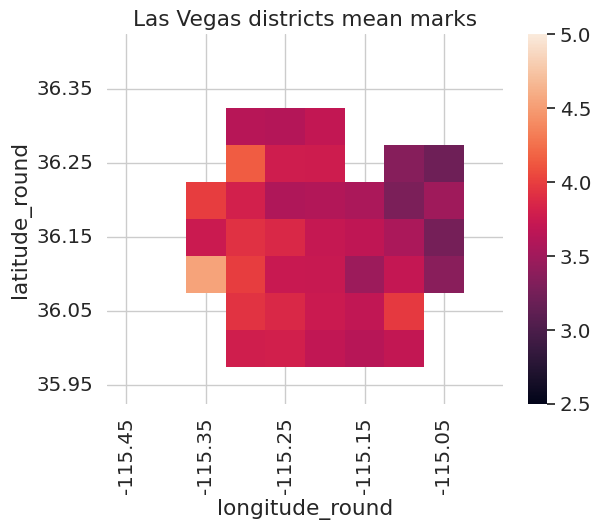

In [348]:
sns.heatmap(coord_mean_mark, vmin=2.5, vmax=5)
ax=plt.gca()
ax.set_xlim([14, 24])
ax.set_ylim([10, 20])
plt.title(f'{frequented} districts mean marks')

Сравните полученный график с предыдущим и сделайте вывод.

**Вывод:**

На этом графике уже явно видно, что имеет смысл смотреть только на ценральные районы, т.к. только там больше 30 заведений на район.

Вывод по городу: восточные районы имеют в среднем меньшие оценки, чем западные. На самом деле даже явно заметна градация увеличения оценок с востока на запад.

#### 3. Рестораны

Будем считать компанию рестораном, если в поле `categories` *содержится* слово `restaurant`. Обратите внимание, что в анализе данных часто нет четкого формата данных. Например, данное слово может быть написано как с большой буквы, так и с маленькой; может как разделяться `;`, так и не разделяться. При возникновении недопонимания стоит посмотреть данные.

Составьте таблицу, в которой будет информация о всех ресторанах города `N`, для которых имеется не менее $5$ отзывов. Далее постройте heatmap-график районов, в котором каждому району сопоставьте среднюю оценку по ресторанам этого района. Рассматривайте только те районы, в которых есть не менее $10$ ресторанов, для каждого из которых есть не менее $5$ отзывов.

Чем полезны ограничения снизу на количество отзывов для ресторана и количество ресторанов в районе?

**Ответ:** <...>

Кот Василий из города `N` очень придирчив к выбору ресторана. Он доверяет только ресторанам с высоким рейтингом, который основывается на большом количестве отзывов. Напечатайте в виде таблицы информацию $10$ ресторанах с самым большим рейтингом в порядке убывания рейтинга. Для каждого из этих ресторанов должно быть не менее $50$ отзывов. По каждому ресторану необходимо вывести следующую информации: название ресторана, средняя оценка, количество отзывов, географические координаты, категории.

In [ ]:
...

Нанесите на карту все рестораны со средней оценкой не менее $4.7$, которая посчитана по не менее $50$ отзывам. Отдельным цветом отметьте 10 ресторанов, которые вы получили ранее.

In [ ]:
...

Охарактеризуйте кота Василия, а также сделайте общий вывод по задаче.

**Вывод:** <...>